In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset1 = pd.read_csv('/content/EXP1.csv')
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values


In [4]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]]
[[  5]
 [ 10]
 [ 15]
 [ 20]
 [ 25]
 [ 30]
 [ 35]
 [ 40]
 [ 45]
 [ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [8]:
# Name:DHAN VARSHINI J P
# Register Number:212224230055
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.fc2 = nn.Linear(8,10)
        self.fc3 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        self.history = {'loss':[]}
  def forward(self, x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x









In [9]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain=NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [10]:
# Name:DHAN VARSHINI J P
# Register Number:212224230055
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
  for epoch in range(epochs):
        optimizer.zero_grad()
        loss=criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()





        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [11]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 3180.945557
Epoch [200/2000], Loss: 2478.644775
Epoch [400/2000], Loss: 1385.261597
Epoch [600/2000], Loss: 556.745728
Epoch [800/2000], Loss: 346.297089
Epoch [1000/2000], Loss: 263.895782
Epoch [1200/2000], Loss: 159.855957
Epoch [1400/2000], Loss: 69.841644
Epoch [1600/2000], Loss: 16.152462
Epoch [1800/2000], Loss: 0.860727


In [12]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 1.317547


In [13]:
loss_df = pd.DataFrame(ai_brain.history)

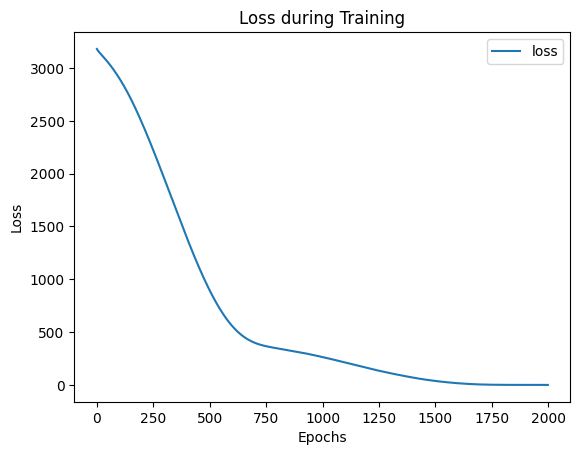

In [14]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [15]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 44.927223205566406
